In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import string

from nltk.corpus import stopwords
from collections import Counter
from wordcloud import STOPWORDS

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [28]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [29]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [30]:
print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


## Target Distribution in Keywords

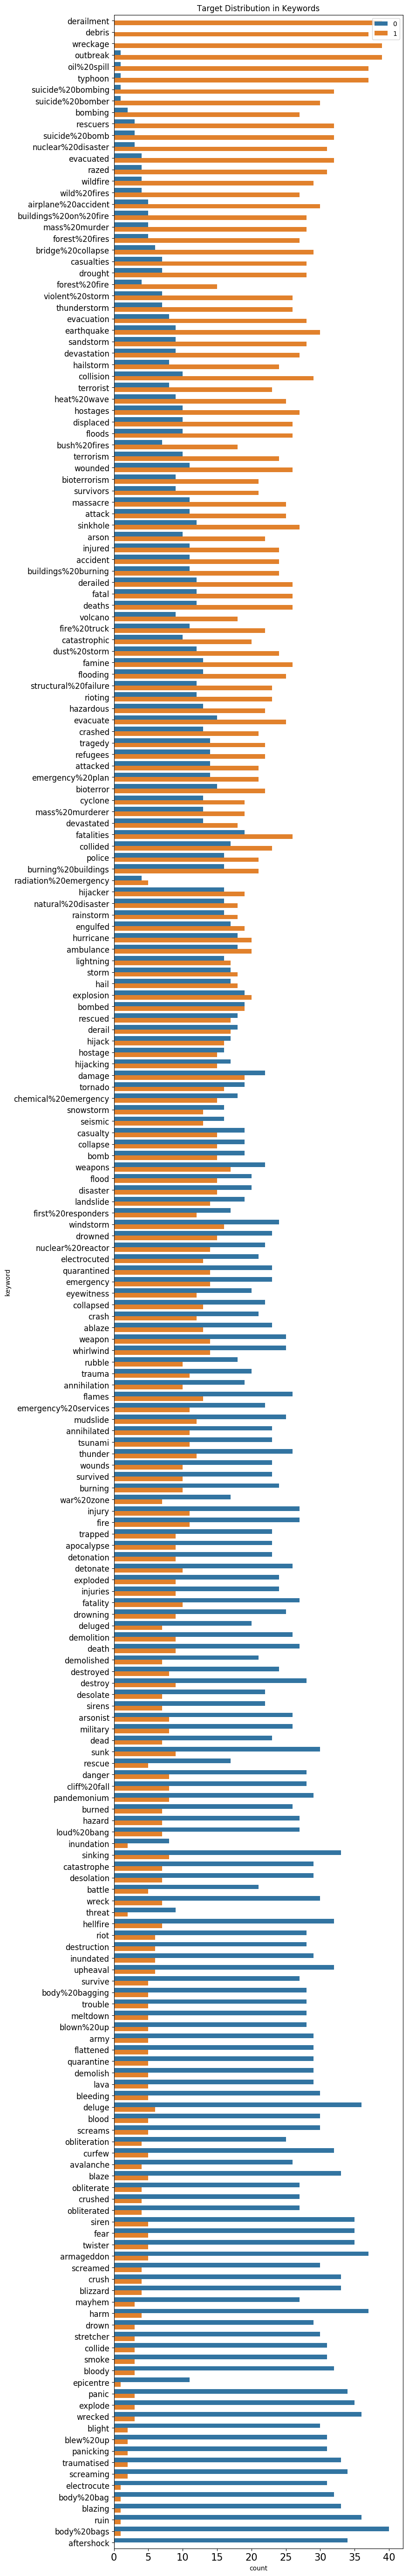

In [31]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

## Feature engineering

In [32]:
# word count
df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(x.split()))

# word frequency
df_train['word_frequency'] = df_train['text'].apply(lambda x: Counter(x.lower().split()))
df_test['word_frequency'] = df_test['text'].apply(lambda x: Counter(x.lower().split()))

# unique words
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(x.lower().split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(x.lower().split())))

# stop words
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([i for i in set(x.lower().split()) if i in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([i for i in set(x.lower().split()) if i in STOPWORDS]))

# url count
df_train['url_count'] = df_train['text'].apply(lambda x: len([i for i in set(x.lower().split()) if 'http' in i]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([i for i in set(x.lower().split()) if 'http' in i]))

# mean word length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: sum(len(w) for w in x.lower().split())/len(x))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: sum(len(w) for w in x.lower().split())/len(x))

# punctuation count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: str(x).count('#'))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: str(x).count('#'))

# mention count
df_train['mention_count'] = df_train['text'].apply(lambda x: str(x).count('@'))
df_test['mention_count'] = df_test['text'].apply(lambda x: str(x).count('@'))

# character count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

In [33]:
df_train.head()

,id,keyword,location,text,target,word_count,word_frequency,unique_word_count,stop_word_count,url_count,mean_word_length,punctuation_count,hashtag_count,mention_count,char_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,"{'our': 1, 'deeds': 1, 'are': 1, 'the': 1, 're...",13,6,0,0.826087,1,1,0,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,"{'forest': 1, 'fire': 1, 'near': 1, 'la': 1, '...",7,0,0,0.842105,1,0,0,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,"{'all': 1, 'residents': 1, 'asked': 1, 'to': 1...",20,9,0,0.842105,3,0,0,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,"{'13,000': 1, 'people': 1, 'receive': 1, '#wil...",8,1,0,0.876923,2,1,0,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,"{'just': 1, 'got': 1, 'sent': 1, 'this': 1, 'p...",15,6,0,0.818182,2,2,0,88


In [36]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = df_train['target'] == 1

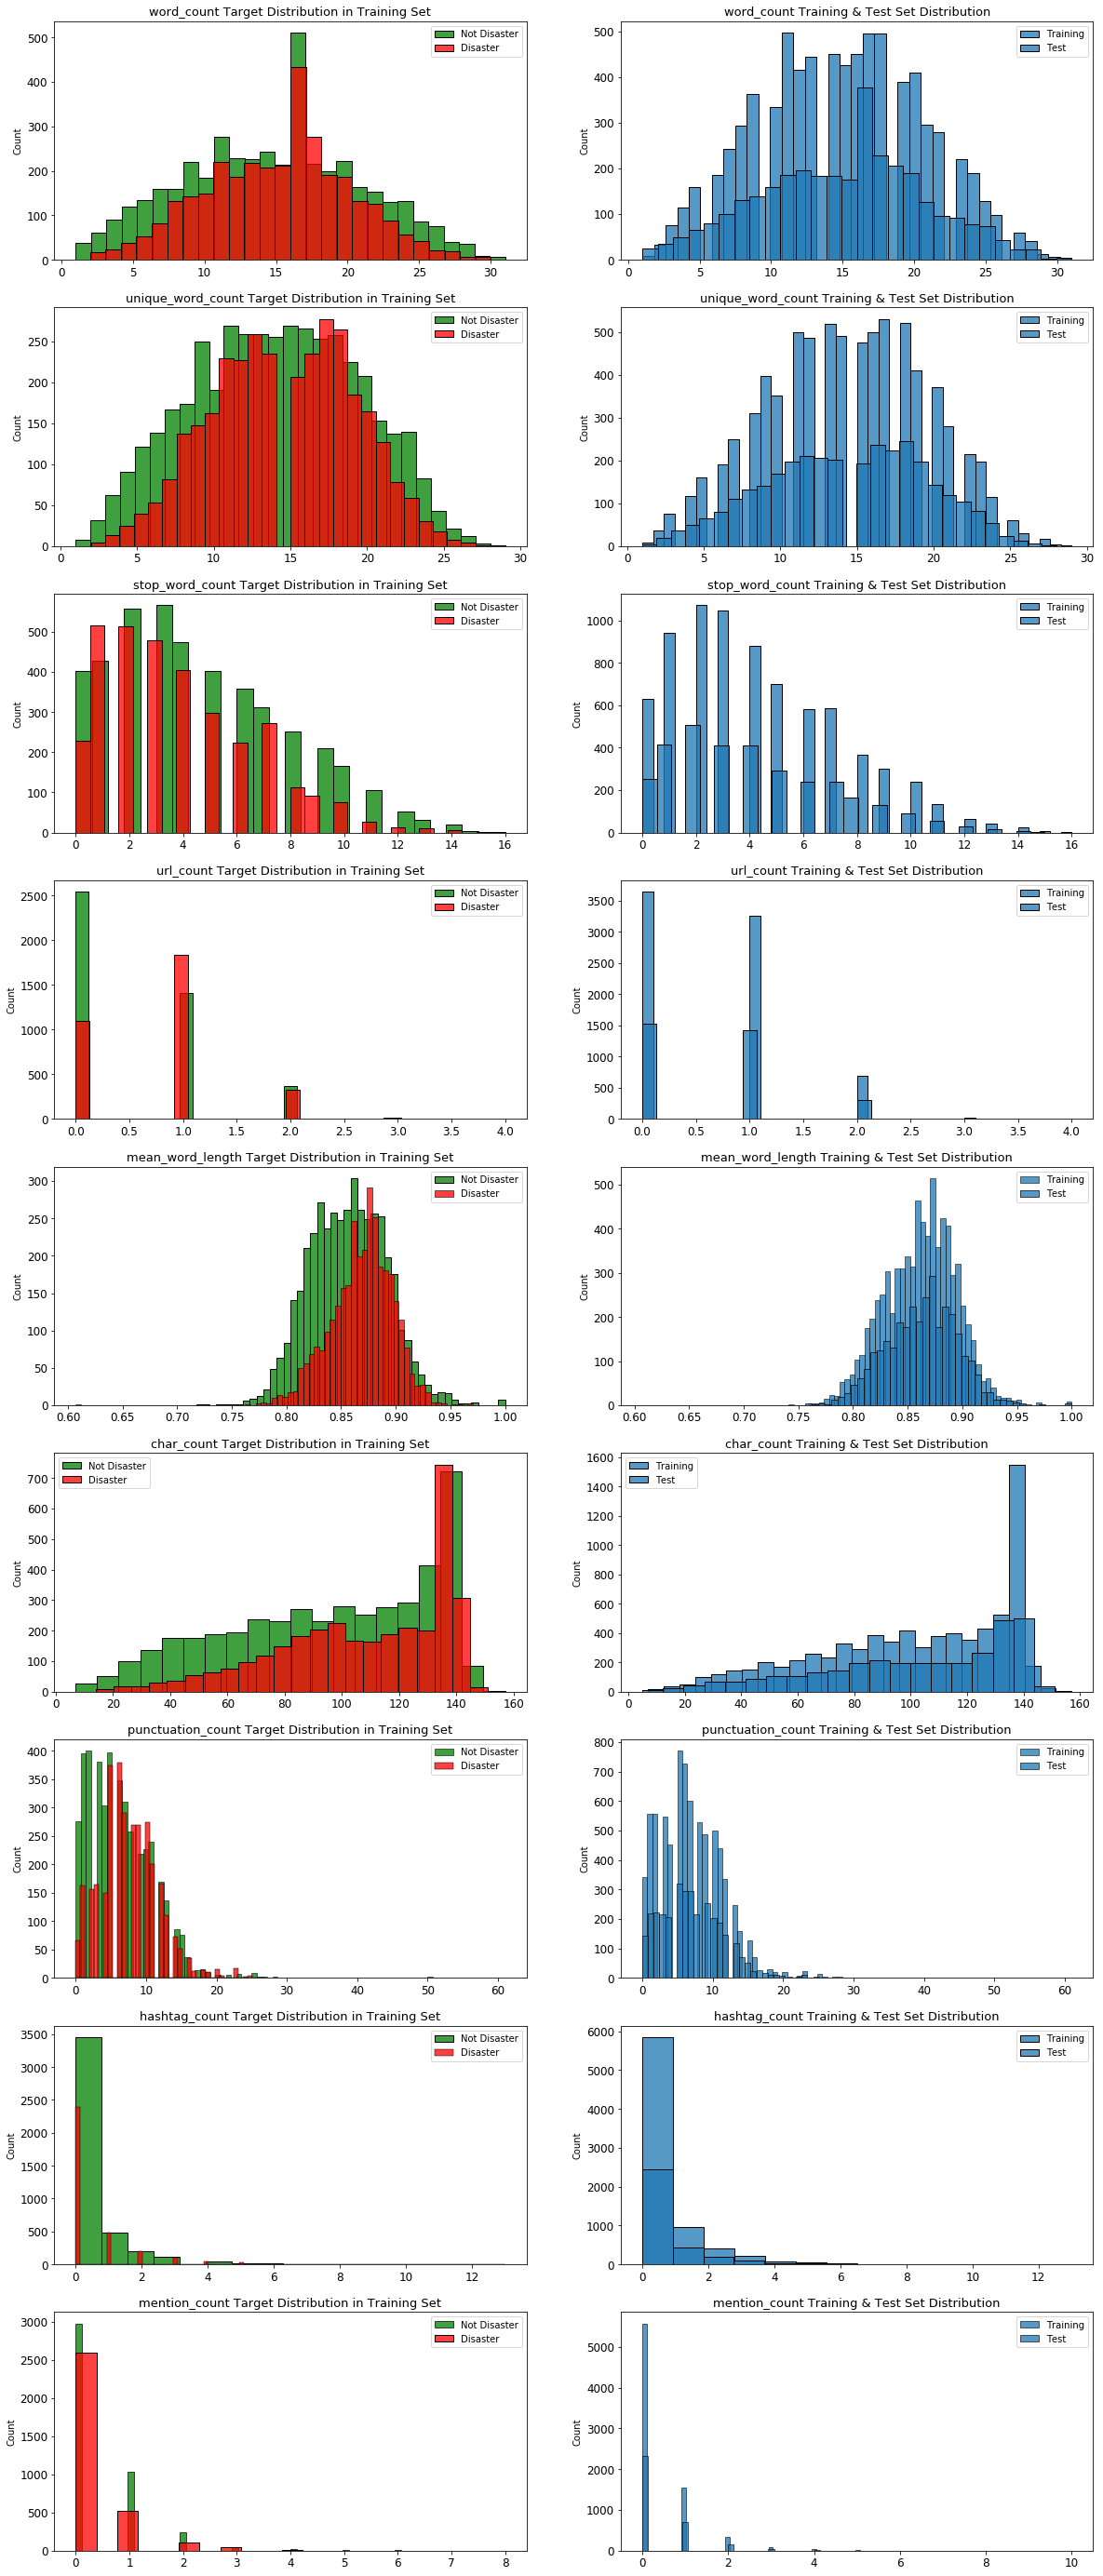

In [49]:
fig, axes = plt.subplots(nrows=len(METAFEATURES), ncols=2, figsize=(20, 50))

for i, feature in enumerate(METAFEATURES):
    sns.histplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.histplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')
    
    sns.histplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.histplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
        
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()